In [1]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=3)
rgen = np.random.RandomState(1)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

In [2]:
import models
import generator

Using TensorFlow backend.


### Test generator 

[0]


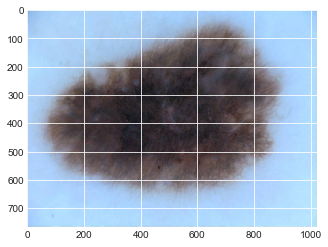

In [3]:
test_generator = generator.Data_Gen("ISIC-Archive-Downloader-master/Data",(0,10),2)
data_x, data_y = test_generator.__getitem__(0)
plt.imshow(data_x[1][0])
print(data_y[0])

In [4]:
model = models.mixed_model()
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [5]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
conv2d_1_input (InputLayer)     (None, 768, 1024, 3) 0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 377, 505, 16) 10816       conv2d_1_input[0][0]             
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 186, 250, 16) 12560       conv2d_1[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 93, 125, 16)  0           conv2d_2[0][0]                   
____________________________________________________________________________________________

In [6]:
# train_gen = generator.Data_Gen("ISIC-Archive-Downloader-master/Data",(0,200),10)
#val_gen = generator.Data_Gen("ISIC-Archive-Downloader-master/Data",(0,20),128)
# print(train_gen.__getitem__(0)[0][0].ndim)
# print(train_gen.__getitem__(0)[0][1].ndim)
# print(train_gen.__getitem__(0)[1].ndim)

model.fit_generator(generator.Data_Gen("ISIC-Archive-Downloader-master/Data",(0,200),50), epochs=2, verbose=1,validation_data=generator.Data_Gen("ISIC-Archive-Downloader-master/Data",(200,300),50))


Epoch 1/2


KeyboardInterrupt: 

In [ ]:
train_gen = generator.Data_Gen("ISIC-Archive-Downloader-master/Data",(0,200),100)
print('1')
temp = train_gen.__getitem__(0)
trainx = temp[0]
trainy = temp[1]
print('2')
temp = train_gen.__getitem__(1)
testx = temp[0]
testy = temp[1]
print('3')

In [ ]:
model.fit(trainx, trainy, batch_size = 5, epochs = 5, verbose = 1, validation_data = (testx, testy))

In [ ]:
generator.resize_images("ISIC-Archive-Downloader-master/Data/Images", (1000,2000))